# Statistics and Machine Learning Assignment

By 
Swasthik Vellingiri Kowsalya


# Chapter 5 

## Question: 3

The k-fold cross validation procedure consists of randomly dividing the set of observations into k folds of approximately equal size. 

(i) Validation Set
Advantages over Validation Set: Using multiple train-test splits provides a better understanding of how your model will perform on unseen data than using one train test split. 
Disadvantages: k-fold cross validation takes more time and computational power when compared to validation set approach.  

(ii) LOOCV

Advantages over LOOCV: Computation time is reduced as we repeated the process only 5 times when the value of k is 5
Disadvantages: If we implement LOOCV, we get much lesser bias than in k-fold cross validation.

# Question 8

## 8 - (a)

In [15]:
install.packages('boot')

package 'boot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\svellingirikowsalya\AppData\Local\Temp\RtmpQD7WNo\downloaded_packages


In [16]:
library(boot)
set.seed(1)
y=rnorm (100)
x=rnorm (100)
y=x-2* x^2+ rnorm (100)

Warning message:
"package 'boot' was built under R version 3.6.3"

n = 100
p =  2

Equation:

Y = X-2X^2 + e

## 8 - (b)

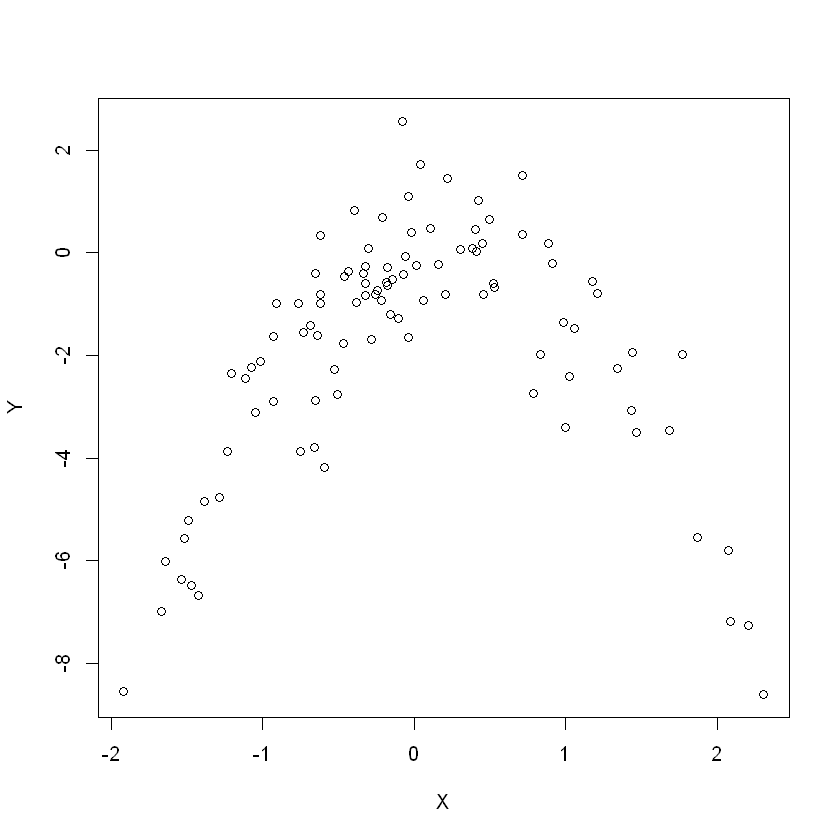

In [17]:
plot(x, y,
     xlab = "X", ylab = "Y", frame = TRUE)

The data points look like a curve

## 8 - (c)

Compute LOOCV 

(i) Y=β0+β1X+ε 


In [39]:
set.seed(100)

Data <- data.frame(x, y)

#model 1
model1 <- glm(y ~ x)

print(paste("Model 1:",cv.glm(Data, model1)$delta[1]))

#model 2
model2 <- glm(y ~ poly(x, 2))

print(paste("Model 2 (poly 2):",cv.glm(Data, model2)$delta[1]))

#model 3
model3 <- glm(y ~ poly(x, 3))

print(paste("Model 3 (poly 3):",cv.glm(Data, model3)$delta[1]))

#model 4
model4 <- glm(y ~ poly(x, 4))

print(paste("Model 4 (poly 4):",cv.glm(Data, model4)$delta[1]))

[1] "Model 1: 5.89097855988842"
[1] "Model 2 (poly 2): 1.0865955642745"
[1] "Model 3 (poly 3): 1.10258509387339"
[1] "Model 4 (poly 4): 1.11477226814507"


## 8 - (d)

In [40]:
set.seed(101)

Data <- data.frame(x, y)

#model 1
model1 <- glm(y ~ x)

print(paste("Model 1:",cv.glm(Data, model1)$delta[1]))

#model 2
model2 <- glm(y ~ poly(x, 2))

print(paste("Model 2 (poly 2):",cv.glm(Data, model2)$delta[1]))

#model 3
model3 <- glm(y ~ poly(x, 3))

print(paste("Model 3 (poly 3):",cv.glm(Data, model3)$delta[1]))

#model 4
model4 <- glm(y ~ poly(x, 4))

print(paste("Model 4 (poly 4):",cv.glm(Data, model4)$delta[1]))

[1] "Model 1: 5.89097855988842"
[1] "Model 2 (poly 2): 1.0865955642745"
[1] "Model 3 (poly 3): 1.10258509387339"
[1] "Model 4 (poly 4): 1.11477226814507"


The resuls are the same. It is because the LOOCV evaluates n fold of a single observation

## 8 - (e)

The model has the lowest LOOCV error because the scatter plot displayed that the datapoints are quadratic

## 8 - (f)

In [42]:
summary(model4)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8914  -0.5244   0.0749   0.5932   2.7796  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8277     0.1041 -17.549   <2e-16 ***
poly(x, 4)1   2.3164     1.0415   2.224   0.0285 *  
poly(x, 4)2 -21.0586     1.0415 -20.220   <2e-16 ***
poly(x, 4)3  -0.3048     1.0415  -0.293   0.7704    
poly(x, 4)4  -0.4926     1.0415  -0.473   0.6373    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1.084654)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 103.04  on 95  degrees of freedom
AIC: 298.78

Number of Fisher Scoring iterations: 2


The p value of the models 1 and 2 are significant whereas it is not higher for models 3 and 4. Yes, these agree with the conclusion drawn based on the cross validation methods. 

# CHapter 6 

##  Question 1

(a) Best subset selection

(b) Best subset selection

(c)
(i) True
(ii) True
(iii) False
(iv) False
(v) True

## Question 9

In [74]:
library(ISLR)

data(College)

## 9 - (a)

In [75]:
set.seed(122)

train1 = sample(1:nrow(College), round(nrow(College) * 0.8))

train_df = College[train1, ]
test_df = College[-train1, ]

## 9 - (b)

In [78]:
lm_ = lm(Apps ~ ., data = train_df)
lm_pred = predict(lm_, test_df)
lm_mse = mean((lm_pred - test_df$Apps)^2)
lm_mse

[1] 895226.1

## 9 - (c)

In [81]:
train_matrix = model.matrix(Apps~.,data=train_df)
test_matrix = model.matrix(Apps~.,data=test_df)

In [85]:
library(glmnet)

grid =10^ seq (10,-2, length =100)

ridge_reg = glmnet (train_matrix,train_df$Apps,alpha=0, lambda =grid)

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"Loaded glmnet 4.1-1


In [90]:
ridge_cv = cv.glmnet(train_matrix,train_df$Apps,alpha=0,lambda=grid)

ridge_lambda = ridge_cv$lambda.min

In [89]:
ridge_new = predict(ridge_reg,s=ridge_lambda,newx = test_matrix)

#MSE
ridge_mse = mean((test_df$Apps-ridge_new)^2)
ridge_mse

[1] 895118.4

The MSE for ridge is 895118.44

## 9 - (d)

In [98]:
lasso_mod = glmnet(train_matrix,train_df$Apps,alpha=1,lambda=grid)

lasso_cv = cv.glmnet(train_matrix,train_df$Apps,alpha=1,lambda=grid)

lasso_lambda = lasso_cv$lambda.min

lasso_new = predict(lasso_mod,s=lasso_lambda,newx =test_matrix)

lasso_mse = mean((test_df$Apps-lasso_new)^2)
lasso_mse

[1] 893428.8

The MSE for lasso is 893428.77

In [99]:
# coefficient

predict(lasso_mod,s=lasso_lambda,type="coefficients")

19 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -851.26853696
(Intercept)    .         
PrivateYes  -417.60477885
Accept         1.61326116
Enroll        -0.90274854
Top10perc     51.22107980
Top25perc    -15.79618531
F.Undergrad    0.05008636
P.Undergrad    0.04738403
Outstate      -0.08993165
Room.Board     0.17975115
Books         -0.07252107
Personal       0.09879977
PhD           -8.80594013
Terminal      -2.70114260
S.F.Ratio     24.83610556
perc.alumni    3.72292816
Expend         0.08185251
Grad.Rate      8.03586620

## 9 - (e)

In [101]:
install.packages('pls')
library(pls)


  There is a binary version available but the source version is later:
    binary source needs_compilation
pls  2.7-3  2.8-0             FALSE



installing the source package 'pls'



[1] 895226.1

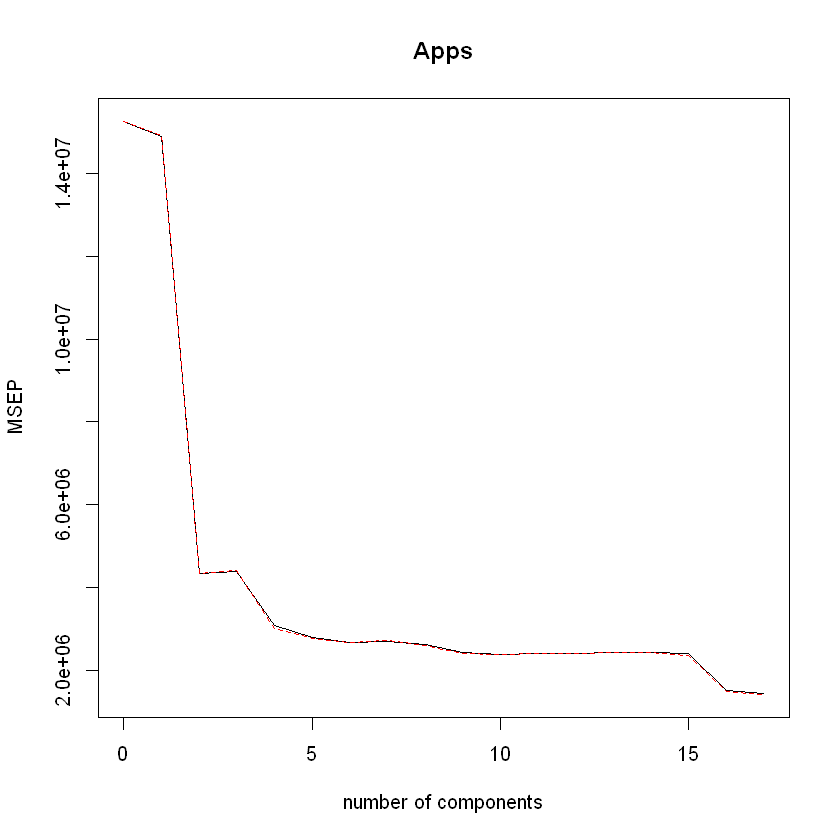

In [113]:
#PCR MODEL 

pcr_model = pcr(Apps ~., data=train_df, scale=TRUE, validation="CV")

validationplot(pcr_model,val.type="MSEP")

pcr_pred = predict(pcr_model,test_df,ncomp=17)

pcr_mse = mean((test_df$Apps-pcr_pred)^2)
pcr_mse

The MSE value is lower when components is 17 and the MSE value is 895226.13

## 9 - (f)

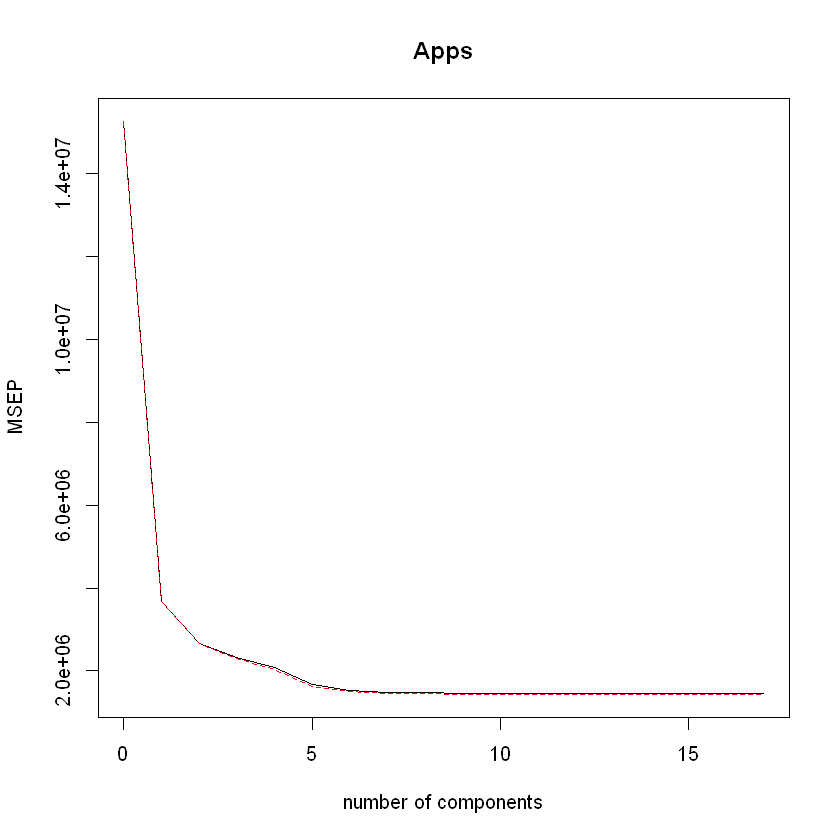

In [112]:
#PLS MODEL

pls_model = plsr(Apps ~., data=train_df, scale=TRUE, validation="CV")

validationplot(pls_model,val.type="MSEP")

In [123]:
pls_pred = predict(pls_model, test_df, ncomp=12)

pls_mse = mean((test_df$Apps-pls_pred)^2)
pls_mse

[1] 894843.3

The MSE value is lower when components is 12 and the MSE value is 894843.34

## 9 - (g)

In [126]:
print(paste("MSE of linear model:",lm_mse))
print(paste("MSE of lasso model:",lasso_mse))
print(paste("MSE of ridge model:",ridge_mse))
print(paste("MSE of pcr model:",pcr_mse))
print(paste("MSE of pls model:",pls_mse))

[1] "MSE of linear model: 895226.136032384"
[1] "MSE of lasso model: 893428.776570646"
[1] "MSE of ridge model: 895118.444305536"
[1] "MSE of pcr model: 895226.136032384"
[1] "MSE of pls model: 894843.340130317"


The MSE of lasso model is the lowest. All the models are closer and there is not a big difference in the errors. 

# Chapter - 7

## Question - 9

## 9 - (a)

In [133]:
library(MASS)

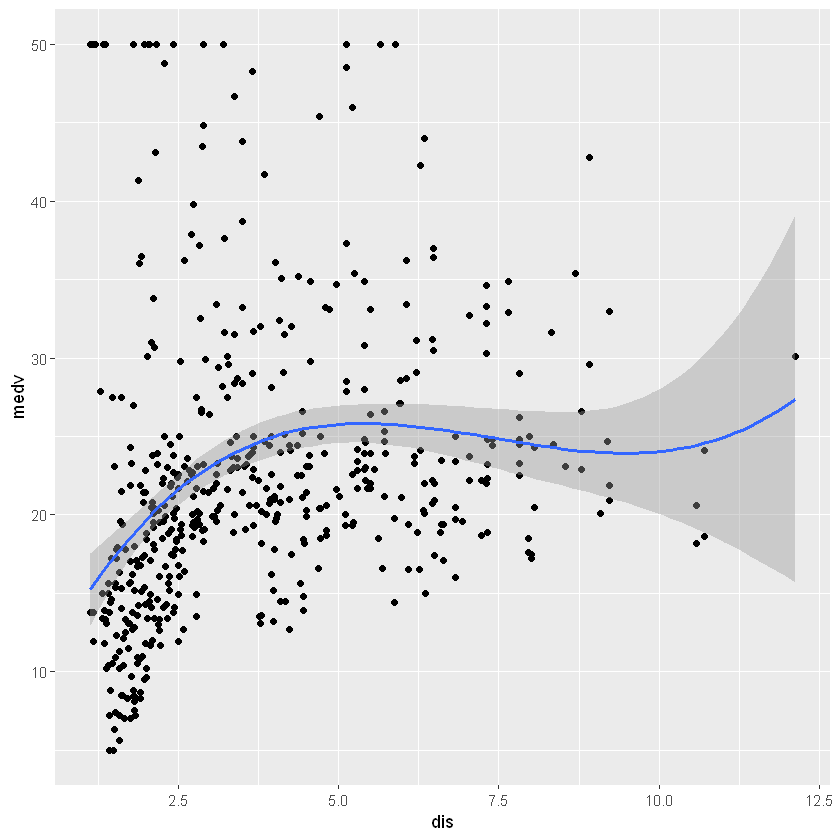

In [158]:
model <- lm(medv ~ poly(dis, 3, raw = T), data = Boston)

ggplot(Boston, aes(x = dis, y = medv)) + geom_point() + 
  geom_smooth(method = "lm", formula = "y ~ poly(x, 3, raw = T)") 

## 9 - (b)

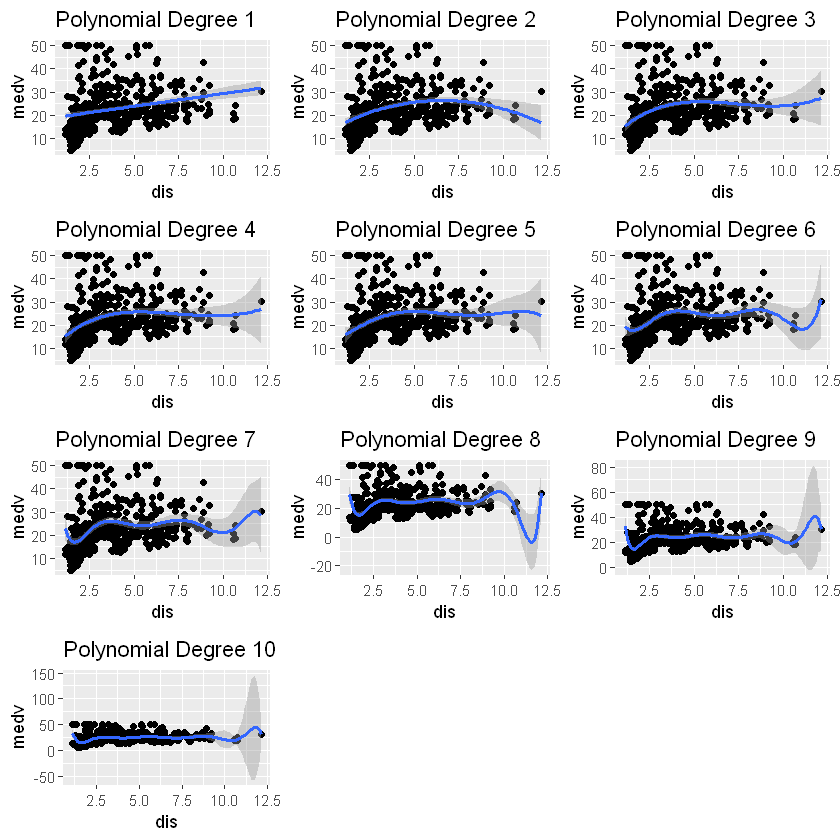

In [159]:
library(gridExtra)
library(grid)
library(ggplot2)
library(lattice)

ggp <- ggplot(Boston, aes(dis, medv)) + geom_point()

#Polynomial plots

p1 = ggp + stat_smooth(method = "lm", formula = y ~ poly(x, 1)) + labs(title = "Polynomial Degree 1")
p2 = ggp + stat_smooth(method = "lm", formula = y ~ poly(x, 2)) + labs(title = "Polynomial Degree 2")
p3 = ggp + stat_smooth(method = "lm", formula = y ~ poly(x, 3)) + labs(title = "Polynomial Degree 3")
p4 = ggp + stat_smooth(method = "lm", formula = y ~ poly(x, 4)) + labs(title = "Polynomial Degree 4")
p5 = ggp + stat_smooth(method = "lm", formula = y ~ poly(x, 5)) + labs(title = "Polynomial Degree 5")
p6 = ggp + stat_smooth(method = "lm", formula = y ~ poly(x, 6)) + labs(title = "Polynomial Degree 6")
p7 = ggp + stat_smooth(method = "lm", formula = y ~ poly(x, 7)) + labs(title = "Polynomial Degree 7")
p8 = ggp + stat_smooth(method = "lm", formula = y ~ poly(x, 8)) + labs(title = "Polynomial Degree 8")
p9 = ggp + stat_smooth(method = "lm", formula = y ~ poly(x, 9)) + labs(title = "Polynomial Degree 9")
p10 = ggp + stat_smooth(method = "lm", formula = y ~ poly(x, 10)) + labs(title = "Polynomial Degree 10")




grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, ncol = 3)

In [170]:
#Finding MSE

mse_ = c()

for (i in 1:10) {
    x = lm(medv ~ poly(dis, i, raw = T), data = Boston)
    mse_[i] = mean(x$residuals^2)
    print(paste("MSE value for Polynomial ",i," is ", mse_[i]))
}


[1] "MSE value for Polynomial  1  is  79.1463415860711"
[1] "MSE value for Polynomial  2  is  76.3544518023521"
[1] "MSE value for Polynomial  3  is  75.5534536644515"
[1] "MSE value for Polynomial  4  is  75.5508974878801"
[1] "MSE value for Polynomial  5  is  75.4853056231394"
[1] "MSE value for Polynomial  6  is  74.2130245486022"
[1] "MSE value for Polynomial  7  is  73.3686635484402"
[1] "MSE value for Polynomial  8  is  70.5688164823019"
[1] "MSE value for Polynomial  9  is  69.8008138199717"
[1] "MSE value for Polynomial  10  is  69.8002290107115"


In [157]:
CV_MSE <- c()

set.seed(159)

for (i in 1:10) {
  model_temp <- train(y = Boston$nox,
                      x = poly(Boston$dis, i, raw = T, simple = T),
                      method = "lm",
                      metric = "MSE")
  CV_MSE[i] <- model_temp$results$MSE
}

ERROR: Error in train(y = Boston$nox, x = poly(Boston$dis, i, raw = T, simple = T), : could not find function "train"


In [201]:
for (i in 1:10) {
  model_ <- lm(medv ~ poly(dis,i), data = Boston)
  MSE[i] <- cv.glm(Boston, model_)$delta[1]
  print(paste("MSE of polynomial",i,"is",MSE[i]))
}

[1] "MSE of polynomial 1 is NaN"
[1] "MSE of polynomial 2 is NaN"
[1] "MSE of polynomial 3 is NaN"
[1] "MSE of polynomial 4 is NaN"
[1] "MSE of polynomial 5 is NaN"
[1] "MSE of polynomial 6 is NaN"
[1] "MSE of polynomial 7 is NaN"
[1] "MSE of polynomial 8 is NaN"
[1] "MSE of polynomial 9 is NaN"
[1] "MSE of polynomial 10 is NaN"
